In [1]:
import requests
import json
import base64

def get_token(client_id, client_secret):
    auth_str = client_id + ":" + client_secret
    auth_bytes = auth_str.encode("utf-8")

    auth_base64 = str(base64.b64encode(auth_bytes), "utf-8")
    url = "https://accounts.spotify.com/api/token"
    headers = {
        "Authorization": "Basic " + auth_base64,
        "Content-Type": "application/x-www-form-urlencoded"
    }
    data = {"grant_type": "client_credentials"}
    result = requests.post(url=url, headers=headers, data=data)
    json_result = json.loads(result.content)
    return json_result['access_token']

In [2]:
def search_for_artist(token, artist_name):
    url = "https://api.spotify.com/v1/search"
    headers = {
        "Authorization": "Bearer " + token,
        "Content-Type": "application/json"
    }
    query = {'q': artist_name, 'type': 'artist', 'limit': 1}
    result = requests.get(url, headers=headers, params=query)
    json_result = result.json()
    return json_result

In [3]:
client_id = "489e275b8c0a4fe78c837086f353fa61"
client_secret = "5df4bb102e2a41349cbf064fc9f4edd9"
# Obtener el token de acceso
token = get_token(client_id, client_secret)
# Ejemplo de búsqueda de información de un artista
artist_name = "Maluma"
result = search_for_artist(token, artist_name)
print(result)

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Maluma&type=artist&offset=0&limit=1', 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1r4hJ1h58CWwUQe3MxPuau'}, 'followers': {'href': None, 'total': 33936632}, 'genres': ['latin pop', 'reggaeton', 'reggaeton colombiano', 'trap latino', 'urbano latino'], 'href': 'https://api.spotify.com/v1/artists/1r4hJ1h58CWwUQe3MxPuau', 'id': '1r4hJ1h58CWwUQe3MxPuau', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb912d3ab996f98aa30d3a05d0', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174912d3ab996f98aa30d3a05d0', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178912d3ab996f98aa30d3a05d0', 'width': 160}], 'name': 'Maluma', 'popularity': 84, 'type': 'artist', 'uri': 'spotify:artist:1r4hJ1h58CWwUQe3MxPuau'}], 'limit': 1, 'next': 'https://api.spotify.com/v1/search?query=Maluma&type=artist&offset=1&limit=1', 'offset': 0, 'previous': 

       popularidad    duracion_ms
count    50.000000      50.000000
mean     82.920000  201019.080000
std      11.999728   38038.661653
min      41.000000   86983.000000
25%      76.000000  179727.500000
50%      85.500000  195327.500000
75%      91.000000  223710.000000
max     100.000000  284892.000000


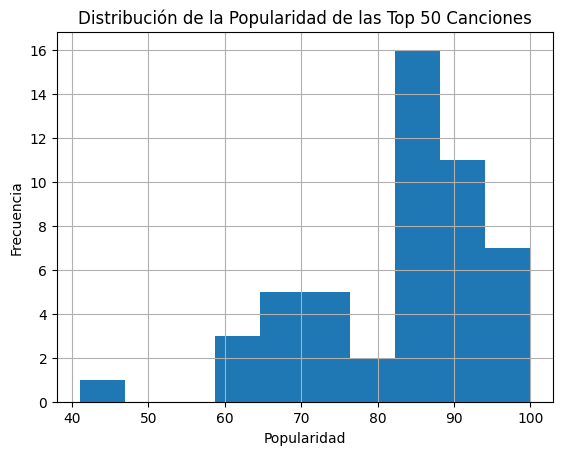

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt

# Configura las credenciales de la API de Spotify
client_credentials_manager = SpotifyClientCredentials(client_id="489e275b8c0a4fe78c837086f353fa61", client_secret="5df4bb102e2a41349cbf064fc9f4edd9")
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Obtiene las top 50 canciones de un país específico (ejemplo: Estados Unidos)
top_tracks = sp.playlist_tracks('spotify:playlist:37i9dQZEVXbLRQDuF5jeBp')  # Este es un ejemplo de ID de playlist para top canciones en EE.UU.

# Extrae información relevante de las canciones
tracks_data = []
for track in top_tracks['items']:
    track_info = track['track']
    tracks_data.append({
        'nombre': track_info['name'],
        'artista': track_info['artists'][0]['name'],
        'popularidad': track_info['popularity'],
        'duracion_ms': track_info['duration_ms']
    })

# Convierte los datos en un DataFrame de pandas para facilitar el análisis
df_tracks = pd.DataFrame(tracks_data)

# Análisis exploratorio básico
print(df_tracks.describe())

# Visualización de la popularidad de las canciones
df_tracks['popularidad'].hist()
plt.title('Distribución de la Popularidad de las Top 50 Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()